## Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('H:/ExcelR Data Science/datasets_BA/Elon_musk.csv',encoding='cp1252')
df

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
df.shape

(1999, 2)

In [4]:
print("Total tweets in given corpus:",df.shape[0])

Total tweets in given corpus: 1999


In [5]:
df.dtypes

Unnamed: 0     int64
Text          object
dtype: object

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
pd.set_option('max_colwidth',500)
df.head(10)

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,"Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM"
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.
9,The most entertaining outcome is the most likely


In [8]:
df['Cleaned_text']=[x.strip()for x in df['Text']]

In [9]:
df.head(10)

,Text,Cleaned_text
0,@kunalb11 I’m an alien,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,@joerogan @Spotify Great interview!,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,"Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM","Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM"
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.,@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.
9,The most entertaining outcome is the most likely,The most entertaining outcome is the most likely


In [10]:
## Converting to lower case

df['Cleaned_text']=[x.lower()for x in df.Text]
df.head(10)

,Text,Cleaned_text
0,@kunalb11 I’m an alien,@kunalb11 i’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,@id_aa_carmack ray tracing on cyberpunk with hdr is next-level. have you tried it?
2,@joerogan @Spotify Great interview!,@joerogan @spotify great interview!
3,@gtera27 Doge is underestimated,@gtera27 doge is underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!,@teslacn congratulations tesla china for amazing execution last year. now on to the next for even more!!
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox! https://t.co/9wfkmyu2oj
6,"Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM","frodo was the underdoge,\nall thought he would fail,\nhimself most of all. https://t.co/zgxjfdzzrm"
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),@owensparks_ @flcnhvy @anonyx10 haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.,@flcnhvy @anonyx10 indeed! tweets definitely do not represent real-world time allocation.
9,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely


In [11]:
## Importing RegEx module
import re

In [12]:
## Removing all urls from text

df['Cleaned_text']=[re.sub(r'http\S+', '',x, flags=re.MULTILINE)for x in df.Cleaned_text]

df.head(10)

,Text,Cleaned_text
0,@kunalb11 I’m an alien,@kunalb11 i’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,@id_aa_carmack ray tracing on cyberpunk with hdr is next-level. have you tried it?
2,@joerogan @Spotify Great interview!,@joerogan @spotify great interview!
3,@gtera27 Doge is underestimated,@gtera27 doge is underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!,@teslacn congratulations tesla china for amazing execution last year. now on to the next for even more!!
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox!
6,"Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM","frodo was the underdoge,\nall thought he would fail,\nhimself most of all."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),@owensparks_ @flcnhvy @anonyx10 haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.,@flcnhvy @anonyx10 indeed! tweets definitely do not represent real-world time allocation.
9,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely


In [13]:
## Removing twitter handles from text

df['Cleaned_text']=[re.sub('@[^\s]+','',x)for x in df.Cleaned_text]

df.head(10)

,Text,Cleaned_text
0,@kunalb11 I’m an alien,i’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,ray tracing on cyberpunk with hdr is next-level. have you tried it?
2,@joerogan @Spotify Great interview!,great interview!
3,@gtera27 Doge is underestimated,doge is underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!,congratulations tesla china for amazing execution last year. now on to the next for even more!!
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox!
6,"Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM","frodo was the underdoge,\nall thought he would fail,\nhimself most of all."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.,indeed! tweets definitely do not represent real-world time allocation.
9,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely


In [14]:
## Removing numbers and special characters

df['Cleaned_text']=[re.sub('[^A-Za-z ]+','',x)for x in df.Cleaned_text]

df.head(10)

,Text,Cleaned_text
0,@kunalb11 I’m an alien,im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,ray tracing on cyberpunk with hdr is nextlevel have you tried it
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge is underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!,congratulations tesla china for amazing execution last year now on to the next for even more
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox
6,"Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM",frodo was the underdogeall thought he would failhimself most of all
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks
8,@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.,indeed tweets definitely do not represent realworld time allocation
9,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely


In [15]:
## Removing short words of length 3 or less

short = re.compile(r'\W*\b\w{1,3}\b')
df['Cleaned_text']=[short.sub('',x)for x in df.Cleaned_text]

df.head(10)

,Text,Cleaned_text
0,@kunalb11 I’m an alien,alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,tracing cyberpunk with nextlevel have tried
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!,congratulations tesla china amazing execution last year next even more
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy year
6,"Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM",frodo underdogeall thought would failhimself most
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks
8,@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.,indeed tweets definitely represent realworld time allocation
9,The most entertaining outcome is the most likely,most entertaining outcome most likely


In [16]:
## Removing StopWords

import nltk
from nltk.corpus import stopwords

## Loading stopwords 
my_stopwords = stopwords.words('english')


In [17]:
df['Cleaned_text'] = df['Cleaned_text'].apply(lambda x: ' '.join([item for item in x.split() if item not in my_stopwords]))

In [18]:
df.head(10)

,Text,Cleaned_text
0,@kunalb11 I’m an alien,alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,tracing cyberpunk nextlevel tried
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!,congratulations tesla china amazing execution last year next even
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy year
6,"Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM",frodo underdogeall thought would failhimself
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks
8,@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.,indeed tweets definitely represent realworld time allocation
9,The most entertaining outcome is the most likely,entertaining outcome likely


### Lemmatization

In [19]:
tweets_merge = [x.strip() for x in df.Cleaned_text] # remove both the leading and the trailing characters
tweets_merge

['alien',
 'tracing cyberpunk nextlevel tried',
 'great interview',
 'doge underestimated',
 'congratulations tesla china amazing execution last year next even',
 'happy year',
 'frodo underdogeall thought would failhimself',
 'haha thanks',
 'indeed tweets definitely represent realworld time allocation',
 'entertaining outcome likely',
 'sent',
 'agree clubhouse',
 '',
 'getting real',
 'bought dogecoin toddler hodler',
 'definitely issues sentencing seems high',
 'thanks fixing',
 'please unlock account',
 'ufuf',
 'true power haha',
 'crypto wallet wont give private keys avoided costs',
 'sucks',
 'nasa selected falcon heavy launch first elements lunar gateway together mission',
 '',
 'predict cash flow reasonably well starlink',
 'starlink staggeringly difficult technical economic endeavor however',
 'spacex needs pass deep chasm negative cash flow next year',
 'lowest cost carbon sequestered value product made must scalable',
 'meant price countries difference taxes shipping',
 'i

In [20]:
tweets_merge = [x for x in tweets_merge if x] # removes empty strings, because they are considered in Python as False
tweets_merge

['alien',
 'tracing cyberpunk nextlevel tried',
 'great interview',
 'doge underestimated',
 'congratulations tesla china amazing execution last year next even',
 'happy year',
 'frodo underdogeall thought would failhimself',
 'haha thanks',
 'indeed tweets definitely represent realworld time allocation',
 'entertaining outcome likely',
 'sent',
 'agree clubhouse',
 'getting real',
 'bought dogecoin toddler hodler',
 'definitely issues sentencing seems high',
 'thanks fixing',
 'please unlock account',
 'ufuf',
 'true power haha',
 'crypto wallet wont give private keys avoided costs',
 'sucks',
 'nasa selected falcon heavy launch first elements lunar gateway together mission',
 'predict cash flow reasonably well starlink',
 'starlink staggeringly difficult technical economic endeavor however',
 'spacex needs pass deep chasm negative cash flow next year',
 'lowest cost carbon sequestered value product made must scalable',
 'meant price countries difference taxes shipping',
 'intended ea

In [21]:
# Joining the list into one string/text
tweets_merge = ' '.join(tweets_merge)
tweets_merge

'alien tracing cyberpunk nextlevel tried great interview doge underestimated congratulations tesla china amazing execution last year next even happy year frodo underdogeall thought would failhimself haha thanks indeed tweets definitely represent realworld time allocation entertaining outcome likely sent agree clubhouse getting real bought dogecoin toddler hodler definitely issues sentencing seems high thanks fixing please unlock account ufuf true power haha crypto wallet wont give private keys avoided costs sucks nasa selected falcon heavy launch first elements lunar gateway together mission predict cash flow reasonably well starlink starlink staggeringly difficult technical economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost carbon sequestered value product made must scalable meant price countries difference taxes shipping intended earth ideas apply mars ufuf xprize team manage carbon capture prize everyone tesla receives stock comp stockopt

In [22]:
from nltk import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

tweet_lemmas = [lemmatizer.lemmatize(t,'v') for t in tweets_merge.split()]
print(tweet_lemmas)

['alien', 'trace', 'cyberpunk', 'nextlevel', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulations', 'tesla', 'china', 'amaze', 'execution', 'last', 'year', 'next', 'even', 'happy', 'year', 'frodo', 'underdogeall', 'think', 'would', 'failhimself', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertain', 'outcome', 'likely', 'send', 'agree', 'clubhouse', 'get', 'real', 'buy', 'dogecoin', 'toddler', 'hodler', 'definitely', 'issue', 'sentence', 'seem', 'high', 'thank', 'fix', 'please', 'unlock', 'account', 'ufuf', 'true', 'power', 'haha', 'crypto', 'wallet', 'wont', 'give', 'private', 'key', 'avoid', 'cost', 'suck', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'first', 'elements', 'lunar', 'gateway', 'together', 'mission', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'starlink', 'staggeringly', 'difficult', 'technical', 'economic', 'endeavor', 'however', 'spacex', 'need', 'pass', 'deep', 'chasm', 'neg

In [23]:
#import nltk
#nltk.download('wordnet')

## Counting positive and negative opinion words from the corpus supplied

In [24]:
## loading the positive and negative emotions list
positive_words=pd.read_csv('H:/ExcelR Data Science/datasets_BA/positive-words-edit.txt',sep='delimiter',header=None,engine='python')
negative_words=pd.read_csv('H:/ExcelR Data Science/datasets_BA/negative-words-edit.txt',sep='delimiter',header=None,engine='python')


In [25]:
positive_words.head()

,0
0,abound
1,abounds
2,abundance
3,abundant
4,accessable


In [26]:
negative_words.head()

,0
0,2-faced
1,2-faces
2,abnormal
3,abolish
4,abominable


In [27]:
## stripping white spaces
positive_words = [w.strip() for w in positive_words[0]] 
negative_words = [w.strip() for w in negative_words[0]] 


In [28]:
print(positive_words[0:10])
print(negative_words[0:10])


['abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade']
['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


In [29]:
print('Total positive words in supplied corpus:',len(positive_words))
print('Total negative words in supplied corpus:',len(negative_words))


Total positive words in supplied corpus: 2005
Total negative words in supplied corpus: 4783


In [30]:
positive_list=[]
negative_list=[]
for word in tweet_lemmas:
    if word in positive_words:
        positive_list.append(word)
    if word in negative_words:
        negative_list.append(word)

In [31]:
print("Total positive words in tweets:",len(positive_list))
print("Total negative words in tweets:",len(negative_list))


Total positive words in tweets: 863
Total negative words in tweets: 428


In [32]:
from collections import Counter

In [33]:
pos_f= Counter(positive_list)
print(pos_f)

Counter({'great': 76, 'good': 51, 'work': 49, 'like': 39, 'well': 29, 'thank': 24, 'better': 23, 'right': 23, 'best': 23, 'pretty': 22, 'cool': 21, 'love': 17, 'super': 16, 'support': 14, 'important': 13, 'appreciate': 13, 'fair': 12, 'accurate': 12, 'enough': 11, 'amaze': 10, 'improve': 10, 'improvements': 10, 'congratulations': 9, 'easy': 8, 'progress': 8, 'fast': 8, 'fine': 7, 'awesome': 7, 'worth': 7, 'safe': 7, 'welcome': 6, 'glad': 6, 'impressive': 6, 'happy': 5, 'tough': 5, 'useful': 5, 'approval': 5, 'positive': 5, 'faster': 5, 'favorite': 5, 'clear': 4, 'incredible': 4, 'reliable': 4, 'excite': 4, 'nice': 4, 'successful': 4, 'improvement': 4, 'entertain': 3, 'reasonably': 3, 'correct': 3, 'sensible': 3, 'wise': 3, 'promise': 3, 'success': 3, 'significant': 3, 'ready': 3, 'prize': 2, 'cute': 2, 'destiny': 2, 'warm': 2, 'beautiful': 2, 'exceptionally': 2, 'smart': 2, 'sustainable': 2, 'free': 2, 'proud': 2, 'inspire': 2, 'autonomous': 2, 'capable': 2, 'cure': 2, 'magic': 2, 'qui

In [34]:
import collections
pos_10=pos_f.most_common(10)
print("Top 10 frequent positive words:\n",pos_10)

Top 10 frequent positive words:
 [('great', 76), ('good', 51), ('work', 49), ('like', 39), ('well', 29), ('thank', 24), ('better', 23), ('right', 23), ('best', 23), ('pretty', 22)]


In [35]:
type(pos_10)

list

In [36]:
pos_10=dict(pos_10)
print(pos_10)

{'great': 76, 'good': 51, 'work': 49, 'like': 39, 'well': 29, 'thank': 24, 'better': 23, 'right': 23, 'best': 23, 'pretty': 22}


In [37]:
neg_f=Counter(negative_list)
print(neg_f)

Counter({'mar': 19, 'hard': 18, 'slow': 11, 'static': 9, 'tank': 8, 'problems': 8, 'sorry': 7, 'cold': 7, 'problem': 6, 'critical': 6, 'irony': 6, 'symptoms': 6, 'lose': 6, 'limit': 6, 'burn': 5, 'wild': 5, 'crazy': 5, 'false': 5, 'issue': 4, 'negative': 4, 'dumb': 4, 'break': 4, 'unfortunately': 4, 'strange': 4, 'blow': 4, 'impossible': 4, 'complex': 4, 'fail': 4, 'suck': 3, 'difficult': 3, 'hang': 3, 'risk': 3, 'hell': 3, 'fallout': 3, 'twist': 3, 'bug': 3, 'wrong': 3, 'incorrect': 3, 'bore': 3, 'abort': 3, 'fear': 3, 'attack': 3, 'loss': 3, 'pain': 2, 'intense': 2, 'scratch': 2, 'foolish': 2, 'weird': 2, 'inevitable': 2, 'trap': 2, 'discord': 2, 'steal': 2, 'suicide': 2, 'fall': 2, 'opposition': 2, 'nightmare': 2, 'knock': 2, 'marginal': 2, 'damn': 2, 'pointless': 2, 'wildly': 2, 'virus': 2, 'decline': 2, 'rumor': 2, 'fault': 2, 'latency': 2, 'trash': 2, 'tension': 2, 'die': 2, 'mistake': 2, 'crash': 2, 'rail': 2, 'insane': 2, 'error': 2, 'jam': 2, 'trivial': 2, 'worst': 2, 'sting':

In [38]:
neg_10=neg_f.most_common(10)
print("Top 10 frequent negative words:\n",neg_10)

Top 10 frequent negative words:
 [('mar', 19), ('hard', 18), ('slow', 11), ('static', 9), ('tank', 8), ('problems', 8), ('sorry', 7), ('cold', 7), ('problem', 6), ('critical', 6)]


In [39]:
neg_10=dict(neg_10)
print(neg_10)

{'mar': 19, 'hard': 18, 'slow': 11, 'static': 9, 'tank': 8, 'problems': 8, 'sorry': 7, 'cold': 7, 'problem': 6, 'critical': 6}


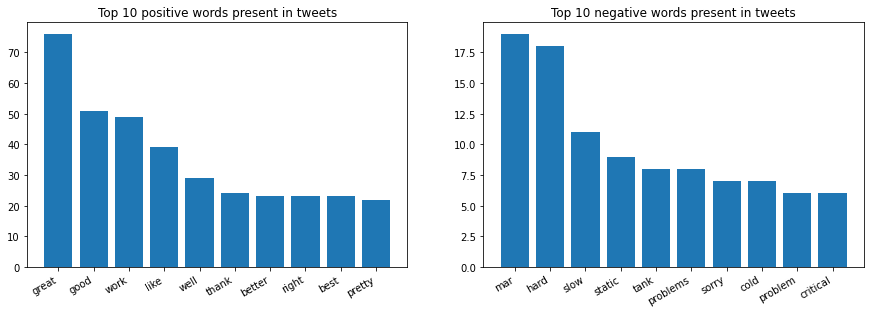

In [40]:
## Plotting top 10 positive words
fig,ax=plt.subplots(1,2,figsize=(15,5))

ax[0].bar(pos_10.keys(),pos_10.values())
ax[1].bar(neg_10.keys(),neg_10.values())

ax[0].set_title('Top 10 positive words present in tweets')
ax[1].set_title('Top 10 negative words present in tweets')

fig.autofmt_xdate()

plt.show()

In [41]:
## Combining both positive and negative emotions in a single list
emotion_list=positive_list+negative_list
print(emotion_list[0:15])

['great', 'congratulations', 'amaze', 'happy', 'thank', 'entertain', 'thank', 'reasonably', 'well', 'prize', 'work', 'enough', 'improve', 'work', 'cute']


In [42]:
## Counting frequency of words in emotion_list
emo_f= Counter(emotion_list)

# First 10 frequent words/emotions
emo_10= emo_f.most_common(10)
print(emo_10)

[('great', 76), ('good', 51), ('work', 49), ('like', 39), ('well', 29), ('thank', 24), ('better', 23), ('right', 23), ('best', 23), ('pretty', 22)]


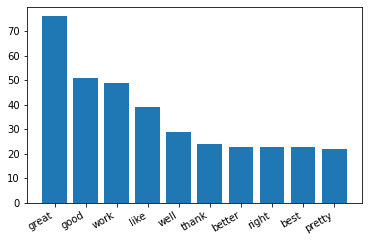

In [43]:
## Plotting the most frequent words in tweets

# Converting list to dict
emo_10=dict(emo_10)

fig,ax=plt.subplots()

ax.bar(emo_10.keys(),emo_10.values())
fig.autofmt_xdate()
plt.show()

## Using Textblob for sentiment analysis

In [44]:
from textblob import TextBlob

In [45]:
type(tweet_lemmas)

list

In [46]:
tweets_join=' '.join(tweet_lemmas)
tweets_join[0:100]

'alien trace cyberpunk nextlevel try great interview doge underestimate congratulations tesla china a'

In [47]:
tweet_blob= TextBlob(tweets_join)
tweet_blob.sentiment

Sentiment(polarity=0.19019508106272776, subjectivity=0.5150267444973315)

## Using Vader Sentiment Intensity Analyzer

In [48]:
#nltk.download('vader_lexicon')

In [49]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [50]:
si = SentimentIntensityAnalyzer()
sentiment_score = si.polarity_scores(tweets_join)
sentiment_score

{'neg': 0.063, 'neu': 0.657, 'pos': 0.28, 'compound': 1.0}

Both Textblob and Vader shows an overall positive sentiment in tweets.